In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from glob import glob
from einops import rearrange

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
from urllib.parse import urlparse
import re

def extract_keywords_from_url(url):
    parsed_url = urlparse(url)
    # Extract the path and remove special characters
    path = re.sub(r'[^a-zA-Z0-9 ]', ' ', parsed_url.path)

    # Combine path and netloc (domain)
    keywords = f" \"{parsed_url.netloc}\" {path}"

    return keywords.strip()

url = "http://www.newyorker.com/online/blogs/currency/2013/09/when-work-is-a-game-who-wins.html"
keywords = extract_keywords_from_url(url)
print(keywords)

"www.newyorker.com"  online blogs currency 2013 09 when work is a game who wins html


In [3]:
tsvs = glob('../data/*.tsv')
dfs = pd.concat([pd.read_csv(tsv, sep='\t', usecols=lambda x: x!='id') for tsv in tsvs])
dfs['url'].fillna('', inplace=True)
dfs['url'] = dfs['url'].apply(extract_keywords_from_url)

In [4]:
dfs[dfs['score'] < 1]

,title,url,score,time,descendants,by,karma
2593,Want to get inside the head of an active inves...,"""resultsjunkies.com"" blog want to get inside ...",0,1351019343,0,paulsingh,876
3038,Get No Cost Baby Diapers if You Are Expecting ...,"""www.babydiapersite.com"" baby diaper get no c...",0,1283313664,-1,fachoi,1
3369,"""Am I the kind of white American Divine Racial...","""weyou.us"" z 14lv",0,1352760854,-1,forthey,1
4150,Feelspace belt,"""www.allelectronics.com"" make a store categor...",0,1353808631,0,dingerma,1
6116,"Ask HN: Angelhack, San Francisco, Dec 1st, any...","""""",0,1353403932,0,postmodern,1
8750,Top tips and ways to make money while studying...,"""top10tips.tk""",0,1274458068,-1,uuuiggugf,1
2170,Tramitar la curp,"""tramitarlacurp.blogspot.com""",0,1362805854,-1,aquetededicas,1
2299,Ask HN: Should I still travel to Jamaica?,"""""",0,1274744226,3,chett,36
6435,Ask HN: Review my App: List App with live coll...,"""""",0,1349869792,-1,iamgopal,818
8350,Key Moments in the Life of Pardot,"""davidcummings.org"" 2012 11 17 key moments in...",0,1353290158,0,ddcummings,1


<Axes: ylabel='Frequency'>

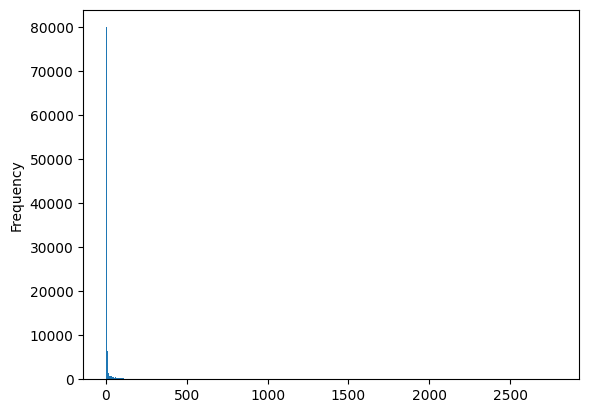

In [5]:
dfs.score.plot.hist(bins=500)

In [4]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   title        100000 non-null  object
 1   url          100000 non-null  object
 2   score        100000 non-null  int64 
 3   time         100000 non-null  int64 
 4   descendants  100000 non-null  int64 
 5   by           100000 non-null  object
 6   karma        100000 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 6.1+ MB


In [5]:
dfs.head()

,title,url,score,time,descendants,by,karma
0,The future of Python build systems and Gentoo,"""blogs.gentoo.org"" mgorny 2021 11 07 the futu...",177,1639142146,78,pantalaimon,12220
1,A $10k Wager on the Laws of Physics,"""www.iflscience.com"" physics a youtube video ...",1,1624806630,0,aliasEli,578
2,"When work is a game, who wins?","""www.newyorker.com"" online blogs currency 201...",1,1379625608,0,mjn,9582
3,Get better at Googling,"""markodenic.com"" use google like a pro",678,1619159846,289,sudo_overflow,294
4,"Ask HN: Review my startup, WebServius","""""",19,1263406892,8,eugeneos,20


In [6]:
dfs[dfs['score'] < 1]

,title,url,score,time,descendants,by,karma
2593,Want to get inside the head of an active inves...,"""resultsjunkies.com"" blog want to get inside ...",0,1351019343,0,paulsingh,876
3038,Get No Cost Baby Diapers if You Are Expecting ...,"""www.babydiapersite.com"" baby diaper get no c...",0,1283313664,-1,fachoi,1
3369,"""Am I the kind of white American Divine Racial...","""weyou.us"" z 14lv",0,1352760854,-1,forthey,1
4150,Feelspace belt,"""www.allelectronics.com"" make a store categor...",0,1353808631,0,dingerma,1
6116,"Ask HN: Angelhack, San Francisco, Dec 1st, any...","""""",0,1353403932,0,postmodern,1
8750,Top tips and ways to make money while studying...,"""top10tips.tk""",0,1274458068,-1,uuuiggugf,1
2170,Tramitar la curp,"""tramitarlacurp.blogspot.com""",0,1362805854,-1,aquetededicas,1
2299,Ask HN: Should I still travel to Jamaica?,"""""",0,1274744226,3,chett,36
6435,Ask HN: Review my App: List App with live coll...,"""""",0,1349869792,-1,iamgopal,818
8350,Key Moments in the Life of Pardot,"""davidcummings.org"" 2012 11 17 key moments in...",0,1353290158,0,ddcummings,1


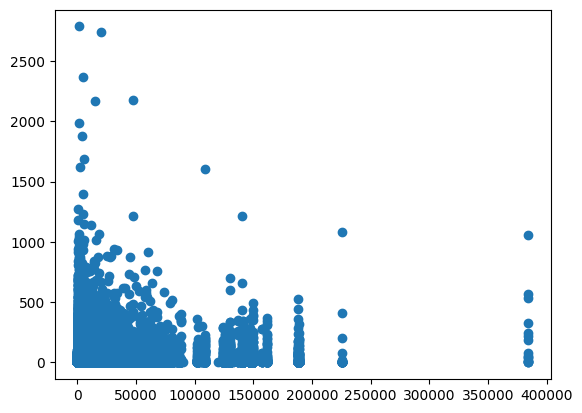

In [5]:
plt.scatter(dfs['karma'], dfs['score'])

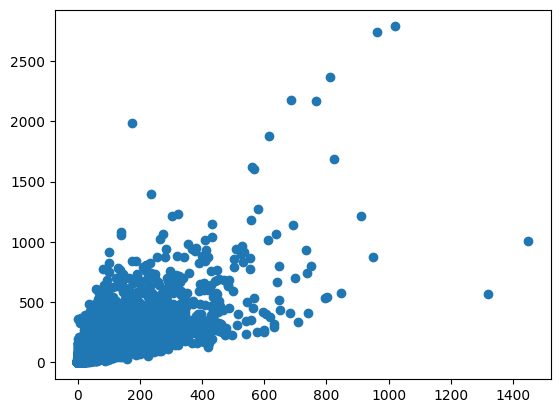

In [6]:
plt.scatter(dfs['descendants'], dfs['score'])

In [7]:
# from sentence_transformers import SentenceTransformer
# from txtai.embeddings import Embeddings
import torch
from scipy.spatial.distance import cosine

import umap
# model = SentenceTransformer('all-MiniLM-L6-v2')
# embeddings = Embeddings(path="sentence-transformers/nli-mpnet-base-v2")
tokenizer = AutoTokenizer.from_pretrained("princeton-nlp/sup-simcse-bert-base-uncased")
model = AutoModel.from_pretrained("princeton-nlp/sup-simcse-bert-base-uncased")
model = model.to(device)

In [8]:
data = dfs['title'].tolist()

In [11]:
@torch.no_grad()
def to_embedding(data):
    inputs = tokenizer(data, padding=True, truncation=True, return_tensors="pt").to(device)
    embedding = model(**inputs, output_hidden_states=True, return_dict=True).pooler_output
    return embedding.cpu().numpy()

In [12]:
dfs['title'] = dfs['title'].apply(to_embedding)

In [14]:
dfs['url'] = dfs['url'].apply(to_embedding)

In [15]:
dfs.to_csv('../data/compiled.csv')

In [16]:
df_c = pd.read_csv('../data/compiled.csv')

In [9]:
step = 1000
outputs = []
for i in tqdm(range(0, len(data), step)):
    inputs = tokenizer(data[i:i+step], padding=True, truncation=True, return_tensors="pt").to(device)
    with torch.no_grad():
        embeddings = model(**inputs, output_hidden_states=True, return_dict=True).pooler_output
        
    outputs.append(embeddings.cpu())
    
embeddings = torch.stack(outputs, dim=0)
embeddings = rearrange(embeddings, 'n s dim -> (n s) dim')

  0%|          | 0/80 [00:00<?, ?it/s]

 18%|█▊        | 14/80 [00:28<02:16,  2.07s/it]


KeyboardInterrupt: 

In [ ]:
embeddings.shape

torch.Size([80000, 768])

In [ ]:
count_df = dfs.by.value_counts()

In [ ]:
count_df

by
rbanffy        579
Tomte          423
tosh           354
pseudolus      317
ingve          299
              ... 
makuchaku        1
chadyj           1
dheerajmpai      1
SocratesV        1
jdr5             1
Name: count, Length: 35432, dtype: int64

In [ ]:
fit = umap.UMAP()
u = fit.fit_transform(embeddings)

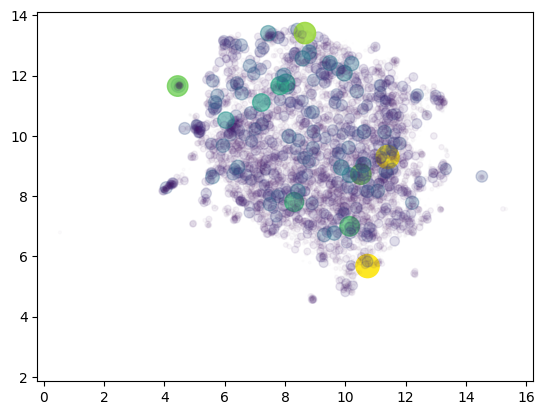

In [ ]:
plt.scatter(u[:, 0],
            u[:, 1],
            c=dfs['score'],
            s=dfs['score'] * 0.1,
            alpha=dfs['score']/max(dfs['score']),
            cmap='viridis')

In [ ]:
step = 1000
outputs = []
for i in tqdm(range(0, len(data), step)):
    inputs = tokenizer(data[i:i+step], padding=True, truncation=True, return_tensors="pt").to(device)
    with torch.no_grad():
        url_embeddings = model(**inputs, output_hidden_states=True, return_dict=True).pooler_output
        
    outputs.append(url_embeddings.cpu())
    
url_embeddings = torch.stack(outputs, dim=0)
url_embeddings = rearrange(url_embeddings, 'n s dim -> (n s) dim')

  0%|          | 0/80 [00:09<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 2.12 GiB (GPU 0; 14.58 GiB total capacity; 8.89 GiB already allocated; 1.47 GiB free; 12.33 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
u_url = fit.fit_transform(url_embeddings)

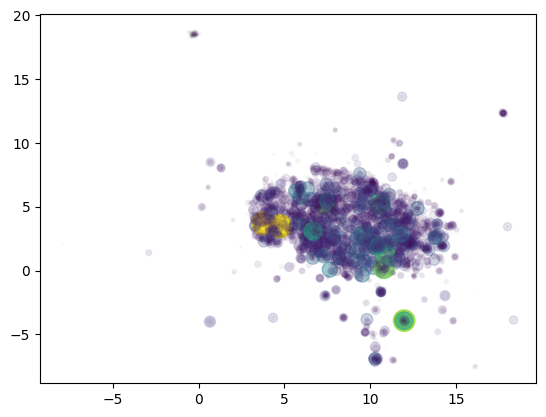

In [ ]:
plt.scatter(u_url[:, 0],
            u_url[:, 1],
            c=dfs['score'],
            s=dfs['score'] * 0.1,
            alpha=dfs['score']/max(dfs['score']),
            cmap='viridis')

In [6]:
from sklearn import tree
dt = tree.DecisionTreeRegressor()
split_ration = 0.8
split_index = int(.8*len(dfs))
train_df, val_df = dfs.iloc[:split_index], dfs.iloc[split_index:]
X = train_df[['descendants', 'karma']]
Y = train_df['score']

In [7]:
dt = dt.fit(X, Y)

In [15]:
preds = dt.predict(val_df[['descendants', 'karma']])
gt = np.array(val_df['score'].tolist())

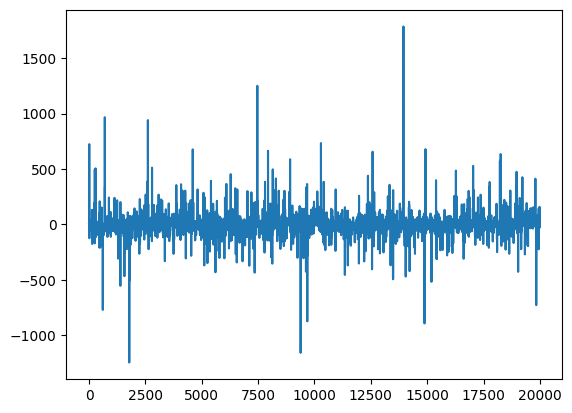

In [17]:
plt.plot(range(len(preds)), preds-gt)